<a href="https://colab.research.google.com/github/anunair222/GRIP_DATAANALYSIS/blob/main/GRIP_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SIMPLE LINEAR REGRESSION**

The task is to predict the percentage of marks that a student is expected to score based on the number of hours studied. This can be done using a simple linear regression model.

In [3]:
#Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression
from sklearn import metrics  

In [4]:
#Loading the data file
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data loaded successfully")
data

Data loaded successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## **Dataset information**

In [5]:
#number of rows and columns
data.shape

(25, 2)

In [6]:
data.info() #more info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


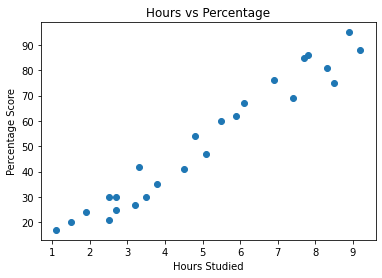

In [8]:
# Plotting the distribution of scores
plt.scatter(data['Hours'],data['Scores'])
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the above plot it is possible to infer that there is a positive linear relation between the qunatities i.e as the number of hours studied increases the percentage score also increases.

## **Data Preparation**

In [9]:
#Dividing the data into feature and target
X = data.iloc[:, :-1].values  #Hours - Feature
y = data.iloc[:, 1].values  #Scores - Target

In [10]:
#Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.80,
                                           test_size=0.20,random_state=42)

## **Create a linear regression model and fit it using the existing data.**

In [11]:
#Creating model
model = LinearRegression()

In [12]:
#Fitting the model with training data
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

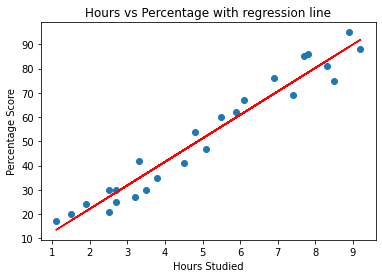

In [19]:
# Plotting the regression line
reg_line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, reg_line, c='red');
plt.title('Hours vs Percentage with regression line')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

## **Prediction**

In [14]:
y_pred = model.predict(X_test) # Predicting the scores using test data

In [15]:
# Comparing Actual vs Predicted Scores
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [16]:
#Let's predict the score for 9.25 hpurs
print('Score of student who studied for 9.25 hours a dat', model.predict([[9.25]]))

Score of student who studied for 9.25 hours a dat [92.38611528]


In [17]:
# You can also test with your own data
hours = 9.25
pred = model.predict([[hours]])
print("No of Hours = ", hours)
print("Predicted Score = ",pred[0])

No of Hours =  9.25
Predicted Score =  92.38611528261494


## **Evaluating the Model**

In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_absolute_error(y_test,
                                                                      y_pred))) 

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 1.9800886824104431
